### **Introduction**

To create this yoruba character recognition we have to first of all segment each text lines in the documents. Then from those letters, segment words and from those words segment each character/letter. Then we feed this character as an input image into our already built recognition system which will tell what the letter is. Doing this recursively, we will be able to go through the whole document and convert it to machine manipulatable characters..

This notebook contains methods we used for line segmentation as at now

**TO TRAIN THE MODEL WE WILL BE USING TO CLASSIFY: We first created a document with all letters in yoruba along with their dots and diacritis in different fonts. Up to 41 different fonts were created. Leading to 3116 different letters**.

Link to document: **https://docs.google.com/document/d/1kf8QHHkfhcdTlcy_Ou9OkjHqDN8LRcx1-ZsYZM5bmXk/edit?usp=sharing**
* Have them scanned.
* line segment them.
* segment each letter from each line
* group each letter into different folders for training

#### **First we import modules to use**

In [1]:
# https://docs.google.com/document/d/1kf8QHHkfhcdTlcy_Ou9OkjHqDN8LRcx1-ZsYZM5bmXk/edit?usp=sharing
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from tqdm import tqdm

To segment lines, we use the **Histogram Projection Method**.. 

* In this method, first make sure that our document is properly skewed(well aligned). 
* Convert image to grey
* Binarize image(make the image contain only two different pixel value) with a particular threshold. Its either a pixel is black or white
* Pixels with letters are known as **foreground pixels** while pixels without letters are known as **background pixels**
* Then we look through each row of the image and check for any foreground pixels.
* Also, search for the next row with only background pixels.
* Then we clip out the gaps betweeen foreground and background pixels rows as a line

In [2]:
def line_one(img, col):
    change = False
    if col != None:
        for co in range(col, img.shape[0]):
            if not all(img[co, :] == 0):
                change = True
                return co
            elif not all(img[co, :] == 0) and change == False: return None

def line_two(img, col, step):
    if col != None:
        for co in range(col, img.shape[0], step):
            if all(img[co, :] == 0):
                return co
    else: print('Curation complete')

def line_curate(img, step = 5):
    global names
    names = []  
    start = 0
    end = 0
    count = 0
    leng = []
    while start != None:
        start = line_one(img,end)
        end = line_two(img, start, step)
        if start != None:
            new = img[start:end,:]
            new = cv2.copyMakeBorder(new,2,2,2,2,cv2.BORDER_CONSTANT,value=0) 
            plt.figure(figsize=(10, 10))
            plt.imshow(new, cmap = 'gray', interpolation = 'bicubic')
            plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
            plt.show()
            count += 1
            name = '/home/max/Pictures/horizontal{}.jpg'.format(count)
            names.append(name)
            cv2.imwrite(name, new)
            leng.append(end-start)
    return leng

#### **See example of scanned image and line segment**

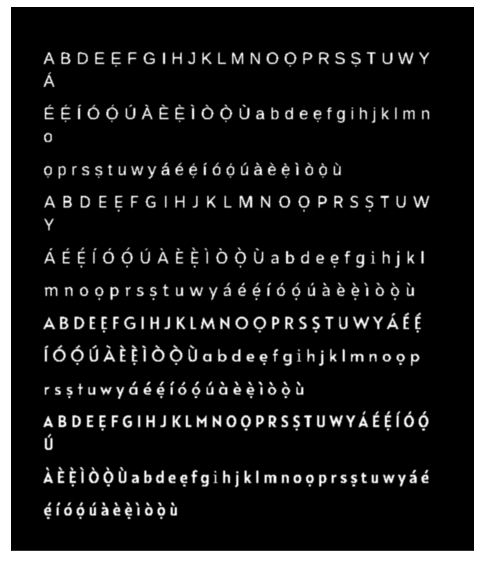

In [3]:
img = cv2.imread('/home/max/Pictures/1.jpg')

#convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#exchange pixels(black to white and white to black)
gray = cv2.bitwise_not(gray)

#threshold for binarizing, from what pixel to what pixel should be black and what pixel value to what pixel value should be white
img = cv2.threshold(gray, 100, 255,cv2.THRESH_BINARY)[1]

#plot image
plt.figure(figsize=(10,10))
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

##### **LINE SEGMENTATION**

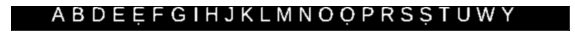

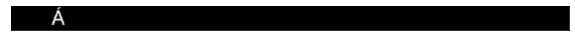

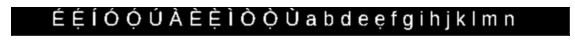

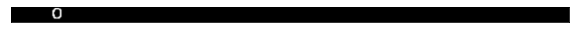

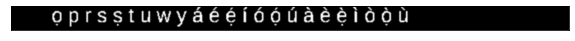

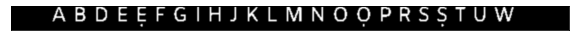

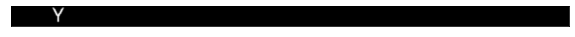

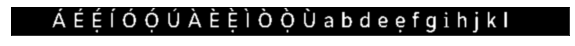

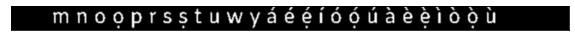

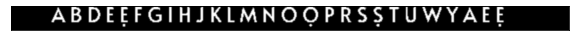

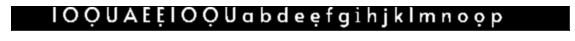

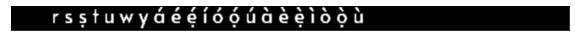

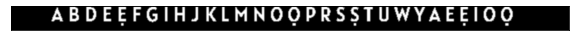

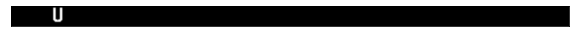

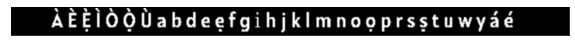

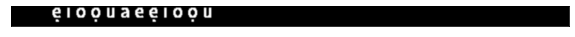

Curation complete


In [4]:
leng = line_curate(img)

#### **LINE SEGMENTAION FAULT AND SOLUTION**

We can see from the previous image that our line segmentation algorithm isn't working fine. It is taking the dots and dashes to represent different intonation for letters as different lines.

To resolve this:
* We check if a line is **less than 1/5 of its previous and next consecutive line added together**.
* If it is, then we concatenate this line with the next consecutive line thereby forming a new line segment.

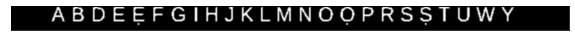

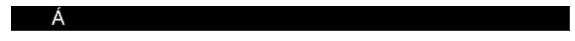

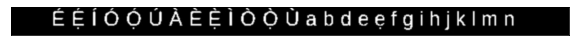

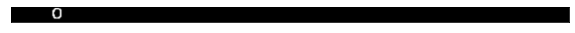

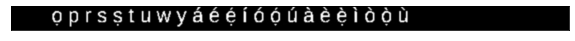

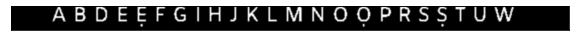

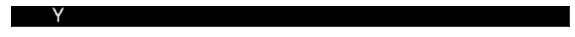

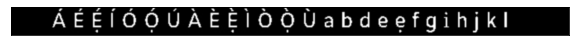

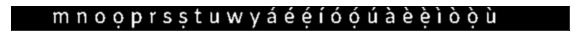

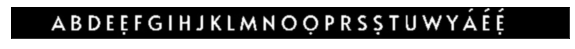

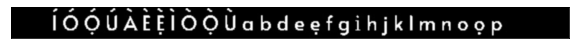

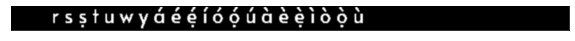

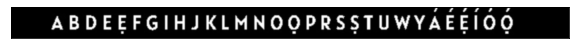

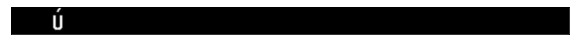

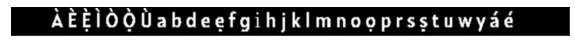

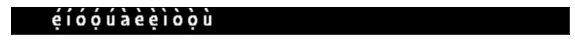

In [5]:
#LINE SEGMENTAION CORRECTION CODE
part = []
for i,j in enumerate(leng):
    if i >0 and i != len(leng)-1:
        prev = leng[i-1]
        next_ = leng[i+1]
        threshold = 1/5*(prev+next_)
        if leng[i] < threshold:
            dots = cv2.imread('/home/max/Pictures/horizontal{}.jpg'.format(i+1), 0)
            letter = cv2.imread('/home/max/Pictures/horizontal{}.jpg'.format(i+2), 0)
            new = np.vstack((dots, letter))
            name = '/home/max/Pictures/horizontal{}.jpg'.format(i+1)
            names[i] = name
            cv2.imwrite(name, new)
            part.append(i+1)
for ele in sorted(part, reverse = True):  
    del names[ele]
for i in names:
    new = cv2.imread(i, 0)
    plt.figure(figsize=(10,10))
    plt.imshow(new, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

#### **LETTER SEGMENTATION**

The same process **Histogram Project Method** was also used to segment the letters. But this was done across the columns instead of along rows.

In [6]:
count = 0
def letter_one(img, col):
    change = False
    for co in range(col, img.shape[1]):
        if not all(img[:, co] == 0):
            change = True
            return co
        elif not all(img[:, co] == 0) and change == False: return None

def letter_two(img, col):
    if col != None:
        for co in range(col, img.shape[1]):
            if all(img[:, co] == 0):
                return co
    else:
        #print('Curation complete')
        return None

    
def letter_curate(img, plot=True):
    start = 0
    end = 0
    while start != None:
        start = letter_one(img,end)
        end = letter_two(img, start)
        #if start != None:
        new = img[:, start:end]
        new = cv2.copyMakeBorder(new,3,0,3,3,cv2.BORDER_CONSTANT,value=0)
        new = cv2.resize(new, (50, 50), interpolation = cv2.INTER_AREA)
        if end != None:
            if plot == True:
                plt.imshow(new, cmap = 'gray', interpolation = 'bicubic')
                plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
                plt.show()
            global count
            count += 1
            name = '/home/max/Pictures/new/{}.jpg'.format(count)
            cv2.imwrite(name, new)

In [7]:
#We segment letters out of each segmented line.
for name in tqdm(names):
    img = cv2.imread(name, 0) 
    _,img = cv2.threshold(img,175,255,cv2.THRESH_BINARY)
    letter_curate(img, plot = False)

100%|██████████| 16/16 [00:00<00:00, 29.01it/s]


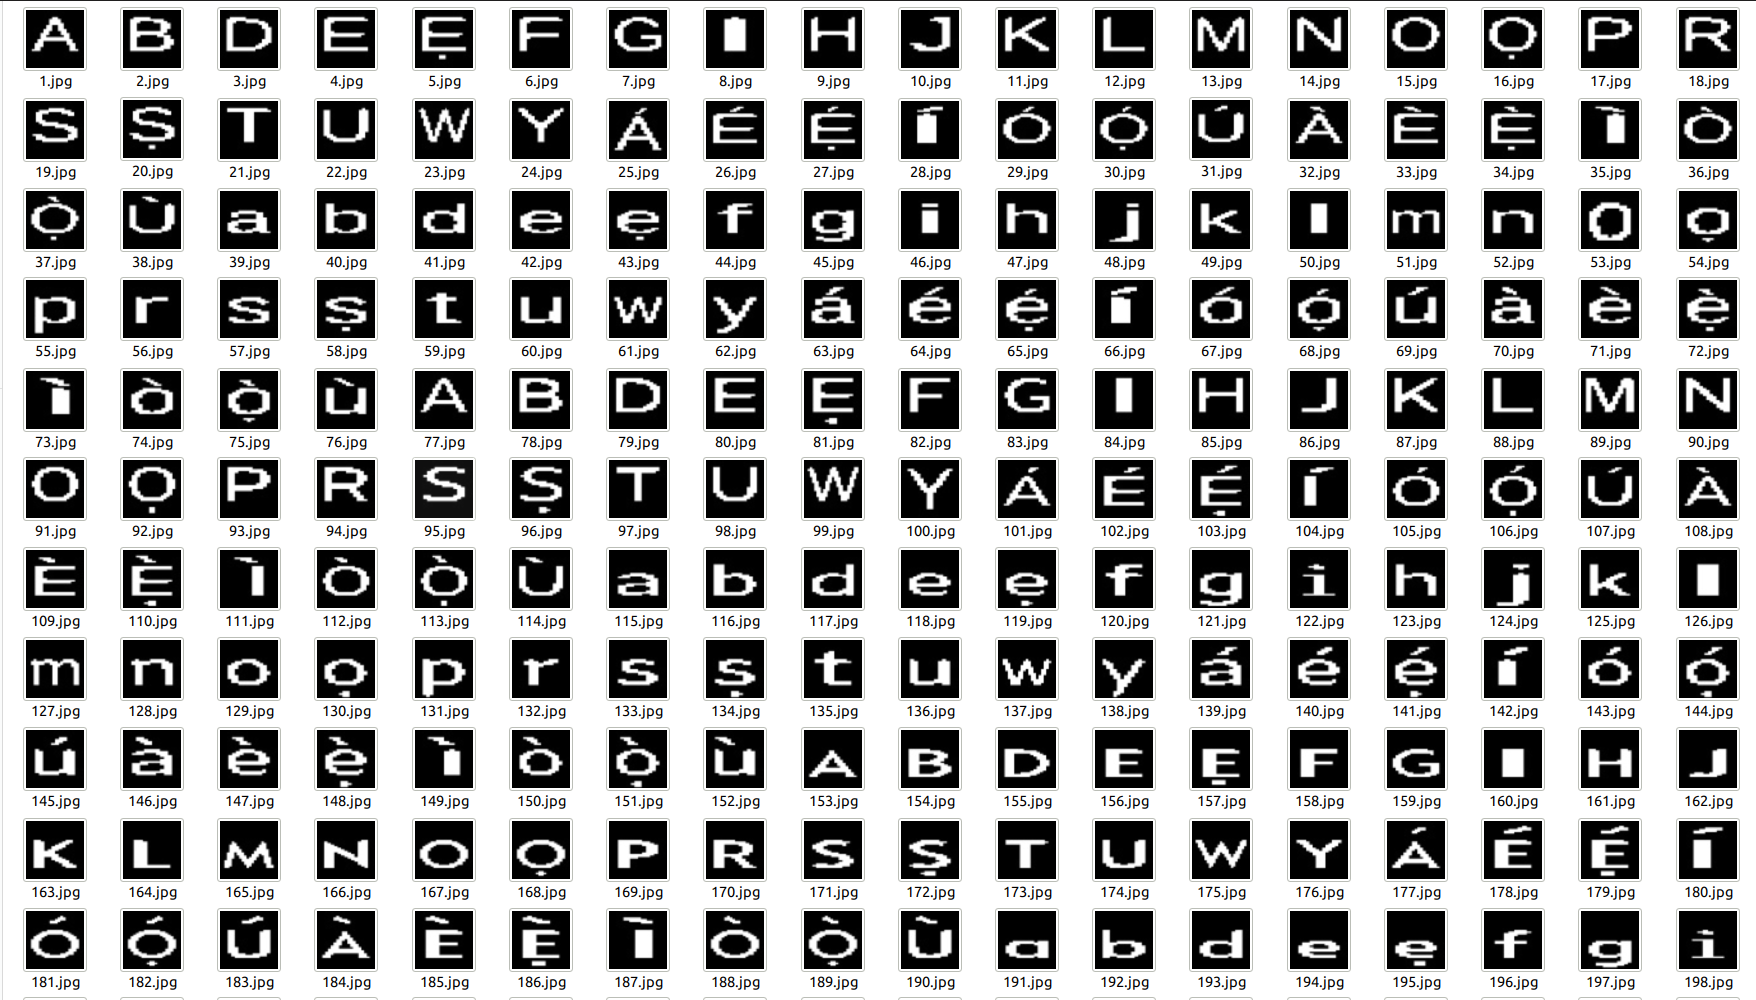

In [9]:
from IPython.display import Image
Image("all.png")

We created a total of **76** different classes from which our model will be classifying each letters into...

**A  B  D  E  Ẹ  F  G  I  H  J  K  L  M  N  O  Ọ  P  R  S  Ṣ  T  U  W  Y**

**Á  É  Ẹ́  Í  Ó  Ọ́  Ú  À  È  Ẹ̀  Ì  Ò  Ọ̀  Ù**

**a  b  d  e  ẹ  f  g  і  h  j  k  l  m  n  o  ọ  p  r  s  ṣ  t  u  w  y**

**á  é  ẹ́  í  ó  ọ́  ú  à  è  ẹ̀  ì  ò  ọ̀  ù**

##### **This images will be sorted into their seperate folders**